# Team-1-ExcelR-P57

# Topic Modelling

## Business objective
Social event tracking and evolution framework to obtain the evolutionary trends of social events and generate effective event summary details over time. The input is the  textual data collected from various social media. Based on the input data, our algorithm can learn multi-modality topics and track multiple events. After tracking, for each event, it can be visualized with texts and image over time. 

## Data Set Details:
Extraction of the textual data from various web sources like "Twitter"

In [1]:
#Installing  libraries
#!pip install tweepy
#!pip install emoji
#!pip install gensim
#!pip install pyLDAvis
#!pip install pyLDAvis

# Importing importantinh libraries
import tweepy

import pandas as pd
import re
import emoji
import nltk

In [2]:
# set variables for keys and tokens to access the Twitter API
mykeys = open('API Twitter.txt','r').read().splitlines()
api_key = mykeys[0]
api_key_secret = mykeys[1]
access_token = mykeys[2]
access_token_secret = mykeys[3]

auth = tweepy.OAuthHandler(consumer_key = api_key, consumer_secret = api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
#Featching the data from twitter
search_words="trending news"
date_since="2021-4-16"
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since)

In [4]:
tweets

In [5]:
import re

In [6]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)

# Iterate and print tweets
s=[]
for tweet in tweets:
    s.append(tweet.text)
    
    

In [7]:
print(s)

['Utah girls sell lemonade to honor late sister, aid organ donation awareness - KIRO Seattle https://t.co/DzlmrKdlKa', '@TradingAllIn @SpartonRes wow great news, is $sri trending on reddit? 👀', 'RT @hrbomber1414: BREAKING NEWS: This will make #XboxGamePass really start to be trending for sure!!!! What are your takes??? This is INSAN…', 'RT @androbliz: Apple Advertises Beats Studio Buds Headphones With Samsung Galaxy S21\nhttps://t.co/MaNOjKFWKz\n#iPhone #Apple #Samsung #AirPo…', 'Apple Advertises Beats Studio Buds Headphones With Samsung Galaxy S21\nhttps://t.co/MaNOjKFWKz\n#iPhone #Apple… https://t.co/XaeoyXpzid', 'As the nation gets ready to celebrate its 245th birthday, a printed copy of the Declaration of Independence has gon… https://t.co/WJhMzKZl3F', 'Sure, a tree grows in Brooklyn. But an oak grows in the kitchen of a west-central Florida home that is on the marke… https://t.co/zQlFlafhds', 'Woman dances with her grandfather to the song Iko Iko in heartwarming viral video. Watch

In [9]:
import pandas as pd
df=pd.DataFrame({'tweet':s})
df

,tweet
0,"Utah girls sell lemonade to honor late sister,..."
1,"@TradingAllIn @SpartonRes wow great news, is $..."
2,RT @hrbomber1414: BREAKING NEWS: This will mak...
3,RT @androbliz: Apple Advertises Beats Studio B...
4,Apple Advertises Beats Studio Buds Headphones ...
...,...
995,Implementing a Scroll To Top feature in #React...
996,"A 5-year-old girl was found dead, locked in a ..."
997,"Now trending on #GETTR\n\n“News” about #Bezos,..."
998,RT @mybroadband: Record number of daily Covid-...


In [10]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

541

In [11]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

154

In [12]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
426,RT @snyders_zack: 🚨NEW TRENDING EVENT NEWS🚨\nJ...,81
430,"RT @szrbsz: [TRENDING] Suzy, a suspicious woma...",28
309,RT @ChoLovesGD2: while seungri trending on nav...,20
412,RT @hrbomber1414: BREAKING NEWS: This will mak...,15
431,RT @szrbsz: [Trending] Suzy's naver article ab...,14
429,RT @szrbsz: [TRENDING] Suzy receives a lot of ...,14
424,RT @saket71: Biggest news today is Kolkata HC ...,12
407,RT @g_2the_d_aash: // mention or rape\n\nSo a ...,12
425,RT @shelton_team: Smithworks Lemonade Southern...,10
368,RT @TSTrendss: Prop types in React and #TypeSc...,10


In [13]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-14-552d22529a9e>:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


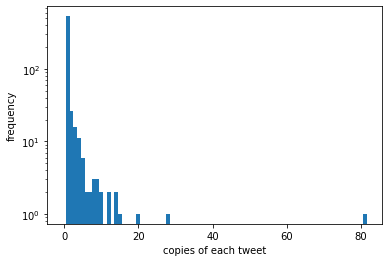

In [14]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [15]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [16]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [17]:
df

,tweet,is_retweet,retweeted,mentioned,hashtags
0,"Utah girls sell lemonade to honor late sister,...",False,[],[],[]
1,"@TradingAllIn @SpartonRes wow great news, is $...",False,[],"[@TradingAllIn, @SpartonRes]",[]
2,RT @hrbomber1414: BREAKING NEWS: This will mak...,True,[@hrbomber1414],[],[#XboxGamePass]
3,RT @androbliz: Apple Advertises Beats Studio B...,True,[@androbliz],[],"[#iPhone, #Apple, #Samsung, #AirPo]"
4,Apple Advertises Beats Studio Buds Headphones ...,False,[],[],"[#iPhone, #Apple]"
...,...,...,...,...,...
995,Implementing a Scroll To Top feature in #React...,False,[],[],"[#React, #reactjs, #javascript, #frontend, #we..."
996,"A 5-year-old girl was found dead, locked in a ...",False,[],[],[]
997,"Now trending on #GETTR\n\n“News” about #Bezos,...",False,[],[],"[#GETTR, #Bezos]"
998,RT @mybroadband: Record number of daily Covid-...,True,[@mybroadband],[],[]


In [18]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [19]:
hashtags_list_df

,hashtags
2,[#XboxGamePass]
3,"[#iPhone, #Apple, #Samsung, #AirPo]"
4,"[#iPhone, #Apple]"
9,[#ImranKhanStudentsKiSunLo]
11,"[#News, #trending, #TrendingNews]"
...,...
993,"[#React, #reactjs, #javascript, #frontend, #we..."
994,"[#Bitcoin, #news, #freebitcoin]"
995,"[#React, #reactjs, #javascript, #frontend, #we..."
997,"[#GETTR, #Bezos]"


In [20]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [21]:
flattened_hashtags_df

,hashtag
0,#XboxGamePass
1,#iPhone
2,#Apple
3,#Samsung
4,#AirPo
...,...
900,#GETTR
901,#Bezos
902,#Celebrity
903,#Trending


In [22]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

220

In [23]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [24]:
popular_hashtags

,hashtag,counts
0,#dormosheio,65
1,#javascript,55
2,#webdev,47
3,#frontend,41
4,#reactjs,34
...,...,...
215,#andro,1
216,#android12,1
217,#asynchronous,1
218,#best,1


In [25]:
# take hashtags which appear at least this amount of times
min_appearance =10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [26]:
popular_hashtags_set

{'#Bitcoin',
 '#Godzilla',
 '#GraphQL',
 '#News',
 '#Trending',
 '#TrendingStocks',
 '#TypeScript',
 '#VueJS',
 '#WestBengal',
 '#XboxGamePass',
 '#beginners',
 '#development',
 '#dormosheio',
 '#frontend',
 '#frontenddev',
 '#javascript',
 '#news',
 '#reactjs',
 '#trending',
 '#webdev'}

In [27]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
hashtags_list_df

,hashtags,popular_hashtags
2,[#XboxGamePass],[#XboxGamePass]
3,"[#iPhone, #Apple, #Samsung, #AirPo]",[]
4,"[#iPhone, #Apple]",[]
9,[#ImranKhanStudentsKiSunLo],[]
11,"[#News, #trending, #TrendingNews]","[#News, #trending]"
...,...,...
993,"[#React, #reactjs, #javascript, #frontend, #we...","[#reactjs, #javascript, #frontend, #webdev, #d..."
994,"[#Bitcoin, #news, #freebitcoin]","[#Bitcoin, #news]"
995,"[#React, #reactjs, #javascript, #frontend, #we...","[#reactjs, #javascript, #frontend, #webdev, #d..."
997,"[#GETTR, #Bezos]",[]


In [28]:
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]
popular_hashtags_list_df

,hashtags,popular_hashtags
2,[#XboxGamePass],[#XboxGamePass]
11,"[#News, #trending, #TrendingNews]","[#News, #trending]"
12,[#XboxGamePass],[#XboxGamePass]
21,"[#trending, #news]","[#trending, #news]"
27,[#Bitcoin],[#Bitcoin]
...,...,...
976,"[#React, #reactjs, #javascript, #frontend, #we...","[#reactjs, #javascript, #frontend, #webdev, #d..."
993,"[#React, #reactjs, #javascript, #frontend, #we...","[#reactjs, #javascript, #frontend, #webdev, #d..."
994,"[#Bitcoin, #news, #freebitcoin]","[#Bitcoin, #news]"
995,"[#React, #reactjs, #javascript, #frontend, #we...","[#reactjs, #javascript, #frontend, #webdev, #d..."


In [29]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [30]:
hashtag_vector_df

,popular_hashtags,#TypeScript,#reactjs,#frontend,#dormosheio,#Bitcoin,#trending,#news,#News,#WestBengal,...,#Trending,#XboxGamePass,#frontenddev,#TrendingStocks,#javascript,#VueJS,#development,#webdev,#Godzilla,#beginners
2,[#XboxGamePass],0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,"[#News, #trending]",0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,[#XboxGamePass],0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
21,"[#trending, #news]",0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27,[#Bitcoin],0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,"[#reactjs, #javascript, #frontend, #webdev, #d...",0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
993,"[#reactjs, #javascript, #frontend, #webdev, #d...",0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
994,"[#Bitcoin, #news]",0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
995,"[#reactjs, #javascript, #frontend, #webdev, #d...",0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [31]:
import seaborn as sns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)
hashtag_matrix

,#TypeScript,#reactjs,#frontend,#dormosheio,#Bitcoin,#trending,#news,#News,#WestBengal,#GraphQL,#Trending,#XboxGamePass,#frontenddev,#TrendingStocks,#javascript,#VueJS,#development,#webdev,#Godzilla,#beginners
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
993,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
994,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
995,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


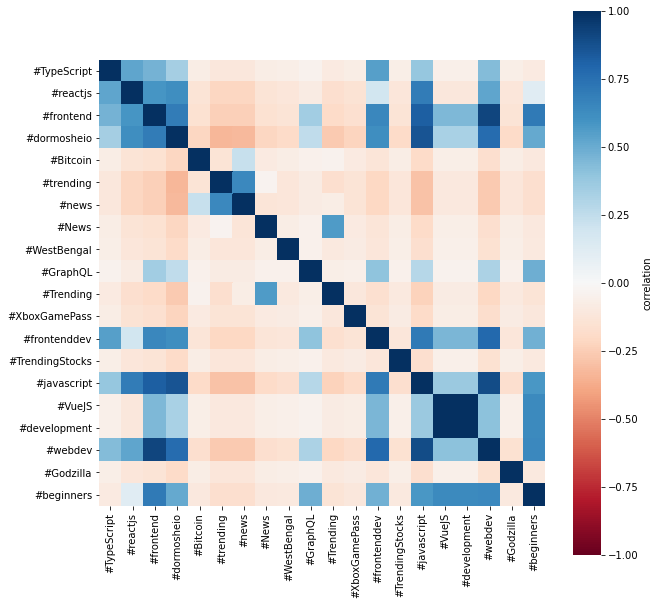

In [32]:

# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

# Data Cleaning & Pre-Processing

In [33]:
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [34]:
import nltk
words = set(nltk.corpus.words.words())

In [35]:

tweet=np.array(df.tweet)
tweet
cleaned_tweet=[]
for i in df.tweet:
    no_punc_text = i.translate(str.maketrans('', '', string.punctuation))
    no_punc_text=re.sub("(RT)?(ht)?", "", no_punc_text)
    no_punc_text1=re.sub("[\W\d]", " ", no_punc_text)
    no_punc_text2=re.sub("[^a-zA-Z]", " ", no_punc_text1)
    no_punc_text2=" ".join(w for w in nltk.wordpunct_tokenize(no_punc_text2) \
         if w.lower() in words or not w.isalpha())
    cleaned_tweet.append(no_punc_text2)
df['cleaned_tweet']=cleaned_tweet
df['cleaned_tweet']

0      sell lemonade to honor late sister aid organ d...
1                               wow great news is sri on
2      BREAKING NEWS This will make really start to b...
3                       Apple Studio With Galaxy S Apple
4                       Apple Studio With Galaxy S Apple
                             ...                        
995                   a Scroll To Top feature in React K
996    A girl was found dead locked in a bedroom in h...
997                                  Now on News about S
998                Record number of daily Covid in South
999    Rita Ora off Enviable Figure in a Lime Green G...
Name: cleaned_tweet, Length: 1000, dtype: object

In [36]:
df1=df.copy() 
corpus=df1.cleaned_tweet.unique()

In [37]:
len(corpus)

510

##### Text Preprocessing
Steps to preprocess text data:

Convert the text into lowercase <br> 
Split text into words  <br>
Remove the stop loss words <br>
Remove the Punctuation, any symbols and special characters <br>
Normalize the word (I'll be using Lemmatization for normalization) <br>

In [38]:
# for text preprocessing
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import numpy for matrix operation
import numpy as np

# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation

# import nltk
#nltk.download('wordnet')

In [39]:

# Apply Preprocessing on the Corpus

# stop loss words 
stop = set(stopwords.words('english'))

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

In [40]:
clean_corpus

[['sell',
  'lemonade',
  'honor',
  'late',
  'sister',
  'aid',
  'organ',
  'donation',
  'awareness'],
 ['wow', 'great', 'news', 'sri'],
 ['breaking', 'news', 'make', 'really', 'start', 'sure'],
 ['apple', 'studio', 'galaxy', 'apple'],
 ['nation',
  'ready',
  'celebrate',
  'th',
  'birthday',
  'printed',
  'copy',
  'declaration',
  'independence',
  'gon',
  'f'],
 ['sure', 'tree', 'oak', 'kitchen', 'home'],
 ['woman', 'grandfather', 'song', 'viral', 'video', 'watch', 'news', 'news'],
 ['le', 'day', 'left', 'studied', 'cause', 'news', 'bee', 'g'],
 ['request', 'taky', 'million', 'ho', 'twitter', 'top', 'trend'],
 ['news', 'confirm', 'theyre', 'dating', 'kiss'],
 ['teen', 'murder', 'still', 'seek', 'via', 'news'],
 ['new', 'event', 'news', 'since', 'release', 'would', 'good', 'day'],
 ['request', 'taky', 'million', 'ho', 'twitter', 'top'],
 ['sell',
  'lemonade',
  'honor',
  'late',
  'sister',
  'aid',
  'organ',
  'donation',
  'awareness',
  'z'],
 ['live', 'new', 'covid', '

##### Convert Text into Numerical Representation
###### Converting the clean preprocessed corpus to array

In [41]:
# Converting text into numerical representation
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Converting text into numerical representation
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [42]:
# Array from TF-IDF Vectorizer 
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

# Array from Count Vectorizer 
cv_arr = cv_vectorizer.fit_transform(clean_corpus)

In [43]:
# this is our converted text to numerical representation from the Tf-IDF vectorizer
tf_idf_arr

<510x1267 sparse matrix of type '<class 'numpy.float64'>'
	with 3082 stored elements in Compressed Sparse Row format>

In [44]:
# this is our converted text to numerical representation from the Count vectorizer
cv_arr

<510x1267 sparse matrix of type '<class 'numpy.int64'>'
	with 3082 stored elements in Compressed Sparse Row format>

In [45]:
# Creating vocabulary array which will represent all the corpus 
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()

# get the vocb list
vocab_tf_idf

['abandoned',
 'abuse',
 'accident',
 'according',
 'account',
 'accused',
 'across',
 'actor',
 'actual',
 'actually',
 'add',
 'added',
 'address',
 'admit',
 'adorable',
 'advertising',
 'advice',
 'affect',
 'afraid',
 'agar',
 'age',
 'agenda',
 'ago',
 'agreed',
 'ahead',
 'ai',
 'aid',
 'air',
 'airfield',
 'aka',
 'alcohol',
 'alec',
 'alien',
 'alive',
 'allegation',
 'allegedly',
 'alley',
 'allow',
 'almost',
 'already',
 'also',
 'alt',
 'always',
 'aly',
 'amber',
 'ame',
 'amid',
 'among',
 'analysis',
 'android',
 'animal',
 'annual',
 'another',
 'antarctica',
 'anthem',
 'antiweed',
 'anybody',
 'apparent',
 'appeal',
 'apple',
 'appreciate',
 'ar',
 'architecture',
 'around',
 'arrest',
 'arrival',
 'article',
 'as',
 'assault',
 'asynchronous',
 'atlantic',
 'atop',
 'attack',
 'attention',
 'auction',
 'audit',
 'august',
 'awake',
 'aware',
 'awareness',
 'away',
 'b',
 'baby',
 'bac',
 'back',
 'bacon',
 'bad',
 'baggage',
 'ban',
 'base',
 'basketball',
 'battle'

In [46]:
# Creating vocabulary array which will represent all the corpus 
vocab_cv = cv_vectorizer.get_feature_names()

# get the vocb list
vocab_cv

['abandoned',
 'abuse',
 'accident',
 'according',
 'account',
 'accused',
 'across',
 'actor',
 'actual',
 'actually',
 'add',
 'added',
 'address',
 'admit',
 'adorable',
 'advertising',
 'advice',
 'affect',
 'afraid',
 'agar',
 'age',
 'agenda',
 'ago',
 'agreed',
 'ahead',
 'ai',
 'aid',
 'air',
 'airfield',
 'aka',
 'alcohol',
 'alec',
 'alien',
 'alive',
 'allegation',
 'allegedly',
 'alley',
 'allow',
 'almost',
 'already',
 'also',
 'alt',
 'always',
 'aly',
 'amber',
 'ame',
 'amid',
 'among',
 'analysis',
 'android',
 'animal',
 'annual',
 'another',
 'antarctica',
 'anthem',
 'antiweed',
 'anybody',
 'apparent',
 'appeal',
 'apple',
 'appreciate',
 'ar',
 'architecture',
 'around',
 'arrest',
 'arrival',
 'article',
 'as',
 'assault',
 'asynchronous',
 'atlantic',
 'atop',
 'attack',
 'attention',
 'auction',
 'audit',
 'august',
 'awake',
 'aware',
 'awareness',
 'away',
 'b',
 'baby',
 'bac',
 'back',
 'bacon',
 'bad',
 'baggage',
 'ban',
 'base',
 'basketball',
 'battle'

In [47]:
display(len(vocab_tf_idf))
display(len(vocab_cv))

1267

1267

# Implementation of LDA

To implement LDA, pass the corpus: document-term matrix to the model. We had above obtained the unique words of vocabulary using both TF-IDF and Count Vectorizer. We can continue with either as have the same unique words in both the obtained vocabularies.

In [48]:
# Implementation of LDA:
    
# Create object for the LDA class 
# Inside this class LDA: define the components:
lda_model = LatentDirichletAllocation(n_components = 10, max_iter = 20, random_state = 20)

# fit transform on model on our count_vectorizer : running this will return our topics 
X_topics = lda_model.fit_transform(cv_arr)

# .components_ gives us our topic distribution 
topic_words = lda_model.components_

##### Retrieve the Topics

In [49]:
#  Define the number of Words that we want to print in every topic : n_top_words
n_top_words = 7

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    #np.argsort() is used to sort the index based on probablity
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['news' 'twitter' 'best' 'via' 'world' 'top']
Topic 2 ['news' 'found' 'boy' 'dead' 'name' 'pay']
Topic 3 ['news' 'via' 'twitter' 'video' 'sure' 'woman']
Topic 4 ['news' 'collapse' 'ai' 'north' 'beach' 'ordered']
Topic 5 ['news' 'f' 'e' 'u' 'attack' 'security']
Topic 6 ['news' 'doge' 'c' 'u' 'via' 'today']
Topic 7 ['news' 'today' 'viral' 'man' 'video' 'medium']
Topic 8 ['news' 'u' 'person' 'one' 'e' 'car']
Topic 9 ['news' 'every' 'medium' 'e' 'channel' 'social']
Topic 10 ['news' 'market' 'current' 'momentum' 'neutral' 'strongly']


 ##### Annotating the topics the documents

In [50]:
# To view what topics are assigned to the douments:

doc_topic = lda_model.transform(tf_idf_arr)  

# iterating over ever value till the end value
for n in range(doc_topic.shape[0]):
    
    # argmax() gives maximum index value
    topic_doc = doc_topic[n].argmax()
    
    # document is n+1  
    print ("Document", n+1, " -- Topic:" ,topic_doc)

Document 1  -- Topic: 2
Document 2  -- Topic: 2
Document 3  -- Topic: 2
Document 4  -- Topic: 1
Document 5  -- Topic: 7
Document 6  -- Topic: 7
Document 7  -- Topic: 2
Document 8  -- Topic: 2
Document 9  -- Topic: 0
Document 10  -- Topic: 0
Document 11  -- Topic: 6
Document 12  -- Topic: 4
Document 13  -- Topic: 0
Document 14  -- Topic: 2
Document 15  -- Topic: 9
Document 16  -- Topic: 4
Document 17  -- Topic: 2
Document 18  -- Topic: 6
Document 19  -- Topic: 9
Document 20  -- Topic: 2
Document 21  -- Topic: 5
Document 22  -- Topic: 6
Document 23  -- Topic: 2
Document 24  -- Topic: 9
Document 25  -- Topic: 8
Document 26  -- Topic: 2
Document 27  -- Topic: 1
Document 28  -- Topic: 1
Document 29  -- Topic: 6
Document 30  -- Topic: 8
Document 31  -- Topic: 6
Document 32  -- Topic: 1
Document 33  -- Topic: 3
Document 34  -- Topic: 6
Document 35  -- Topic: 8
Document 36  -- Topic: 7
Document 37  -- Topic: 7
Document 38  -- Topic: 2
Document 39  -- Topic: 3
Document 40  -- Topic: 7
Document 

Document 394  -- Topic: 8
Document 395  -- Topic: 0
Document 396  -- Topic: 4
Document 397  -- Topic: 3
Document 398  -- Topic: 4
Document 399  -- Topic: 8
Document 400  -- Topic: 2
Document 401  -- Topic: 8
Document 402  -- Topic: 0
Document 403  -- Topic: 8
Document 404  -- Topic: 3
Document 405  -- Topic: 6
Document 406  -- Topic: 4
Document 407  -- Topic: 7
Document 408  -- Topic: 1
Document 409  -- Topic: 6
Document 410  -- Topic: 1
Document 411  -- Topic: 5
Document 412  -- Topic: 7
Document 413  -- Topic: 1
Document 414  -- Topic: 0
Document 415  -- Topic: 1
Document 416  -- Topic: 7
Document 417  -- Topic: 7
Document 418  -- Topic: 0
Document 419  -- Topic: 0
Document 420  -- Topic: 3
Document 421  -- Topic: 1
Document 422  -- Topic: 4
Document 423  -- Topic: 1
Document 424  -- Topic: 6
Document 425  -- Topic: 2
Document 426  -- Topic: 8
Document 427  -- Topic: 2
Document 428  -- Topic: 6
Document 429  -- Topic: 3
Document 430  -- Topic: 6
Document 431  -- Topic: 3
Document 432

# This is the final output which gives us the topic along with the documents.